# Lenguajes formales

Desde el nacimiento estamos expuestos a *lenguajes naturales*; estos son
lenguajes escritos y hablados por los seres humanos, como el español, el
japonés, el griego, etc.
Estos lenguajes han evolucionado a través de los siglos como especies vivientes,
y los lingüistas los estudian como tales.
Aunque los lenguajes naturales tienen reglas de sintaxis y semántica, estas
reglas son muy complejas, contienen muchas excepciones, y cada dialecto tiene
sus propias variantes.
Véase esta canción sobre lo [difícil que es hablar el español][1] (nótese que la
letra es explícita).

Los *lenguajes artificiales* son aquellos que han sido creados por los seres
humanos para aplicaciones específicas.
Por ejemplo, el esperanto es un lenguaje diseñado para la comunicación entre
naciones de diferentes lenguas europeas, el Klingon es un lenguaje inventado
para la serie de televisión Star Trek, y J. R. Tolkien creó varios lenguajes
para sus novelas de fantasía.

Los *lenguajes formales* son una forma de lenguaje artificial definido con
reglas de sintaxis y semántica muy precisas... matemáticamente precisas, de
hecho.
En efecto, el propio lenguaje matemático, con sus símbolos de operaciones y
relaciones, es una especie de lenguaje formal; también las fórmulas químicas
están definidas por un lenguaje formal.
Finalmente, dentro de esta categoría están todos los *lenguajes de
programación*, diseñados concretamente para expresar algoritmos.

[1]: https://www.youtube.com/watch?v=eyGFz-zIjHE

## 1. Describir un lenguaje de programación

En lingüística, un lenguaje se describe en tres niveles:
- *Gramática*: Definida por un alfabeto, léxico, y reglas de sintaxis, 
  responde la pregunta "¿qué es una oración válida en este lenguaje?".
- *Semántica*: Atribuye un significado a las oraciones válidas, responde la
  pregunta "¿qué significa esta oración?".
- *Pragmática*: Define el uso del lenguaje, responde la pregunta "¿cómo usamos
  este enunciado significativo?". Diferentes enunciados con el mismo significado
  pueden ser usados de formas distintas por diferentes personas y en diferentes
  contextos.

**Ejemplo** Consideremos un lenguaje natural usado para describir recetas de
cocina en español.
La gramática de este lenguaje está definida por el alfabeto español, el léxico
se conforma de palabras que se usan en recetas, como "mezclar", "batir",
"leche", "huevos", etc.
La semántica de este lenguaje está dada por el significado de las palabras, por
ejemplo, "mezclar" significa combinar dos o más ingredientes en un recipiente.
Finalmente, la pragmática le indica al lector cómo usar las instrucciones de la
receta para preparar el platillo.

En el caso de los lenguajes de programación podemos agregar la *implementación*,
que responde la pregunta "¿cómo se realiza este enunciado de forma que respete
el significado?".
Continuando el ejemplo anterior, la implementación de una receta la realiza un
cocinero, siguiendo las instrucciones de la receta y definiendo de manera
precisa (a veces sin darse cuenta) los pasos a seguir para preparar el platillo.
Así, "sal al gusto" puede significar "agrega sal hasta que el sabor sea de tu
agrado", y la implementación de esta instrucción depende de la experiencia del
cocinero.

**Actividad** Explorar la [Referencia del Lenguaje Python][1] su definición
gramatical, semántica y pragmática.

[1]: https://docs.python.org/es/3/reference/index.html

## 2. Elementos de teoría de lenguajes

### Alfabetos

Para describir un lenguaje formal, se requieren conceptos de teoría de lenguajes
formales, que son parte del estudio de la *Teoría de la Computación* y las
*Matemáticas Discretas* en general.

Un **alfabeto** es un conjunto finito de *símbolos*.
La naturaleza de los símbolos nos es irrelevante para la teoría de lenguajes,
pero se entiende que son elementos claramente distinguibles entre sí.
Usamos las letras griegas mayúsculas como $\Sigma$ y $\Gamma$ para denotar
alfabetos, y letras de tipo `monoespaciado` para denotar cadenas de símbolos.

El alfabeto más usado por las computadoras es el **alfabeto binario**:
$$\Sigma = \{\texttt{0}, \texttt{1}\}$$
pero en general se puede usar cualquier alfabeto, por ejemplo, el alfabeto
español:
$$\Sigma = \{\texttt{a}, \texttt{b}, \texttt{c}, \ldots, \texttt{z}\}$$


En particular, Python utiliza el alfabeto [Unicode][1], que contiene más de
100,000 símbolos, incluyendo letras, números, símbolos matemáticos, emojis,
carácteres chinos, etc.

[1]: https://unicode.org/

In [1]:
# Puedes hacer esto, pero mejor no lo hagas
from math import pi as π

print(π)

3.141592653589793


In [2]:
# La función chr permite convertir un número de símbolo Unicode en el
# carácter correspondiente.
for codigo in [104, 111, 108, 97]:
    print(f"{codigo} ↦ {chr(codigo)!r}")

104 ↦ 'h'
111 ↦ 'o'
108 ↦ 'l'
97 ↦ 'a'


### Cadenas

Una cadena (usualmente denotada con la letra $w$) es una secuencia finita de
símbolos de un alfabeto $\Sigma$; se denota con los símbolos yuxtapuestos, sin
comas entre sus elementos, por ejemplo:
$$w = \texttt{hola}$$
$$w = \texttt{010101}$$

La **longitud** de una cadena $w$ se denota con $\left|w\right|$, y es el número de
símbolos que contiene:
$$\left|\texttt{hola}\right| = 4$$

In [3]:
# En Python, las cadenas se pueden definir con comillas simples o dobles.
w = "hola"
w

'hola'

In [4]:
# La longitud de una cadena se puede obtener con la función len.
len(w)

4

Existe una cadena especial, llamada **cadena vacía** y denotada con
$\varepsilon$, que no contiene símbolos:

In [5]:
epsilon = ""
len(epsilon)

0

Decimos que una cadena $z$ es una **subcadena** de otra cadena $w$ si los
símbolos de $z$ aparecen consecutivamente en cualquier parte de $w$.
Por ejemplo, `cara`, `cola` y `araco` son algunas de las subcadenas de
`caracola`.


In [6]:
# En Python, podemos determinar si una cadena es subcadena de otra con
# el operador "in".
w = "caracola"
print("cara" in w)
print("cola" in w)
print("araco" in w)
print("maraca" in w)
print("" in w)  # La cadena vacía es subcadena de cualquier cadena.

True
True
True
False
True


Dado que tenemos dos cadenas $x$ y $y$, podemos **concatenarlas** para formar
una nueva cadena $xy$.
En matemáticas esta se denota simplemente yuxtaponiendo las cadenas, de la misma
manera que la multiplicación en álgebra.
En cambio, los lenguajes de programación suelen usar operadores como `+` o `&`.

In [7]:
# En Python la concatenación de cadenas se realiza con el operador +.
"col" + "chones"

'colchones'

Si la multiplicación repetida es la potenciación, entonces la concatenación
repetida es la **potenciación de cadenas**.
Por ejemplo, si $w = \texttt{na}$, entonces $w^3 = \texttt{nanana}$, de manera
que $\texttt{ba}{(\texttt{na})}^2 = \texttt{banana}$.

In [8]:
# En Python la repetición de cadenas se realiza con el operador *.
"ba" + 2 * "na"

'banana'

El **orden lexicográfico** es el orden que se usa para ordenar las palabras en
un diccionario.

In [9]:
# En Python las cadenas están ordenadas lexicográficamente.

cadenas = [
    "col",
    "itacate",
    "zapote",
    "calabaza",
    "panal",
    "pan",
    "jitomate",
    "aguacate",
]
cadenas.sort()
cadenas

['aguacate',
 'calabaza',
 'col',
 'itacate',
 'jitomate',
 'pan',
 'panal',
 'zapote']

Las computadoras suelen utilizar una equivalencia entre números y símbolos para
compararlas.
En nuestro caso, Python utiliza el alfabeto Unicode.

In [10]:
# La función ord es la función inversa de chr, es decir que permite
# obtener el código Unicode de un carácter.

texto = "talavera"
for simbolo in texto:
    print(f"{simbolo!r} ↦ {ord(simbolo)}")

't' ↦ 116
'a' ↦ 97
'l' ↦ 108
'a' ↦ 97
'v' ↦ 118
'e' ↦ 101
'r' ↦ 114
'a' ↦ 97


In [11]:
# Nótese que en Unicode, las mayúsculas preceden a las minúsculas:
texto = "ABZabz"
for simbolo in texto:
    print(f"{simbolo!r} ↦ {ord(simbolo)}")

'A' ↦ 65
'B' ↦ 66
'Z' ↦ 90
'a' ↦ 97
'b' ↦ 98
'z' ↦ 122


In [12]:
# Mayúsculas antes que minúsculas.
"Zapato" < "alfombra"

True

Usualmente preferimos usar otro orden de manera que las palabras más pequeñas
aparezcan primero, este es el orden **shortléxico**, o simplemente **orden
de cadenas**.

In [13]:
from materiales.lenguajes.numerabilidad import Shortlex

# Ordenar utilizando el orden shortléxico.
cadenas.sort(key=Shortlex)
cadenas

['col',
 'pan',
 'panal',
 'zapote',
 'itacate',
 'aguacate',
 'calabaza',
 'jitomate']

### Lenguajes
Un **lenguaje** es un conjunto (finito o infinito) de cadenas.

In [14]:
print("Este es un lenguaje finito:")
print(cadenas)

Este es un lenguaje finito:
['col', 'pan', 'panal', 'zapote', 'itacate', 'aguacate', 'calabaza', 'jitomate']


En computación los lenguajes se pueden representar como una colección (lista,
cadena, etc.), pero esto solo funciona con lenguajes finitos.
Una forma alternativa es utilizar un **enumerador**, que es un algoritmo que
produce todos los elementos de un conjunto.

En Python los enumeradores se pueden implementar con *generadores*, que son
funciones que producen un valor cada vez utilizando la palabra reservada
`yield`.

In [15]:
from typing import Iterator


# Definimos un iterador que enumera los puntos cardinales.
def puntos_cardinales() -> Iterator[str]:
    yield "este"
    yield "norte"
    yield "oeste"
    yield "sur"


# Un iterador es un objeto que avanza sobre una sucesión de elementos
# cada vez que se llama a la función next.
iterador = puntos_cardinales()
print(next(iterador).upper())
print(next(iterador).upper())
print(next(iterador).upper())
print(next(iterador).upper())
# Cando se agotan los elementos se produce una excepción StopIteration.
# next(iterador)   # Descomenta esta línea para ver el error.

ESTE
NORTE
OESTE
SUR


In [16]:
# Un iterador se suele recorrer con un ciclo for
for punto_cardinal in puntos_cardinales():
    print(punto_cardinal.upper())

ESTE
NORTE
OESTE
SUR


In [17]:
# La clase `list` se puede usar para convertir un iterador en una lista.
list(puntos_cardinales())

['este', 'norte', 'oeste', 'sur']

Los enumeradores son más útiles e interesantes cuando los usamos para generar
lenguajes infinitos, por ejemplo, el lenguaje de todos los números primos
escritos sobre el alfabeto decimal
$$\Sigma = \{\texttt{0}, \texttt{1}, \texttt{2}, \texttt{3}, \texttt{4},
\texttt{5}, \texttt{6}, \texttt{7}, \texttt{8}, \texttt{9}\}$$ 


In [18]:
def tiene_divisor(num, primos):
    """Determina si un número tiene un divisor en la lista de primos."""
    for primo in primos:
        if primo * primo > num:
            return False  # No es necesario buscar más
        if num % primo == 0:
            return True  # Encontramos un divisor
    return False


def numeros_primos():
    """Genera todos los números primos."""
    primos = []
    num = 2
    while True:
        if not tiene_divisor(num, primos):
            primos.append(num)
            yield str(num)
        num += 1

Llegados a este punto, no podemos usar un ciclo `for` para enumerar todos los
números primos, ni tampoco podemos guardarlos en una lista, porque son
infinitos y el generador nunca terminaría.

```python
# Este ciclo nunca termina:
for primo in primos():
    print(primo)
```

```python
# Esta instrucción consume toda la memoria disponible y nunca termina:
lista = list(primos())
```

In [19]:
# La clase `islice` del módulo itertools permite obtener una porción
# finita de un iterador.
from itertools import islice

lenguaje = numeros_primos()

list(islice(lenguaje, 10))  # Primeros 10 números primos

['2', '3', '5', '7', '11', '13', '17', '19', '23', '29']

In [20]:
# Siguientes 10 números primos
list(islice(lenguaje, 10))

['31', '37', '41', '43', '47', '53', '59', '61', '67', '71']

Si $\Sigma$ es un alfabeto, denotamos con $\Sigma^*$ (*Sigma estrella*) al lenguaje de todas las cadenas que se pueden formar sobre dicho alfabeto.
Al operador estrella se le conoce como la **cerradura de Kleene**.

**Ejemplo**: El lenguaje de todas las cadenas sobre $\{\texttt{a}, \texttt{b}\}$.

In [21]:
from materiales.lenguajes.numerabilidad import estrella

lenguaje = estrella(alfabeto="ab")
list(islice(lenguaje, 10))  # Primeros 10 elementos

['', 'a', 'b', 'aa', 'ab', 'ba', 'bb', 'aaa', 'aab', 'aba']

**Ejemplo** El lenguaje estrella con peras y manzanas (y naranjas).

In [22]:
lenguaje = estrella("🍎🍐🍊")
list(islice(lenguaje, 20))  # Primeros 20 elementos

['',
 '🍎',
 '🍐',
 '🍊',
 '🍎🍎',
 '🍎🍐',
 '🍎🍊',
 '🍐🍎',
 '🍐🍐',
 '🍐🍊',
 '🍊🍎',
 '🍊🍐',
 '🍊🍊',
 '🍎🍎🍎',
 '🍎🍎🍐',
 '🍎🍎🍊',
 '🍎🍐🍎',
 '🍎🍐🍐',
 '🍎🍐🍊',
 '🍎🍊🍎']

In [23]:

list(islice(lenguaje, 1020, 1030))  # Elementos del 1020 al 1030

['🍊🍊🍐🍎🍎🍐',
 '🍊🍊🍐🍎🍎🍊',
 '🍊🍊🍐🍎🍐🍎',
 '🍊🍊🍐🍎🍐🍐',
 '🍊🍊🍐🍎🍐🍊',
 '🍊🍊🍐🍎🍊🍎',
 '🍊🍊🍐🍎🍊🍐',
 '🍊🍊🍐🍎🍊🍊',
 '🍊🍊🍐🍐🍎🍎',
 '🍊🍊🍐🍐🍎🍐']

El lenguaje $\Sigma^*$ tiene gran interés teórico porque cualquier lenguaje
sobre el alfabeto $\Sigma$ es un subconjunto de $\Sigma^*$.
De esta forma, para crear un enumerador de un lenguaje $L$ sobre $\Sigma$ basta
con crear un enumerador de $\Sigma^*$ y filtrar los elementos que no pertenecen
a $L$.

**Ejemplo**: El lenguaje $L$ de todas las cadenas sobre el alfabeto
$\{\texttt{a}, \texttt{b}\}$ que tienen la misma cantidad de `a` que de `b`:
$$L = \left\{ w \in \{\texttt{a}, \texttt{b}\}^* \middle | w.\mathit{contar}(\texttt{a}) = w.\mathit{contar}(\texttt{b}) \right\}$$

In [24]:
def lenguaje_ejemplo():
    for palabra in estrella("ab"):
        if palabra.count("a") == palabra.count("b"):
            yield palabra


list(islice(lenguaje_ejemplo(), 10))  # Primeros 10 elementos

['', 'ab', 'ba', 'aabb', 'abab', 'abba', 'baab', 'baba', 'bbaa', 'aaabbb']

Podemos generalizar el ejemplo anterior:
- Una **función booleana** es aquella que devuelve `True` o `False`.
- Un **decididor** para un lenguaje $L$ es una función booleana que *siempre*
  termina, y que devuelve `True` en las cadenas de $L$ y `False` en las demás.
- Si existe un decididor para un lenguaje $L$, entonces podemos construir un
  enumerador para $L$ de la siguiente manera:
  ```python
  def enumerador():
      for palabra in estrella(alfabeto):
          if decididor(palabra):
              yield palabra
  ``` 

**Ejemplo**: Hacer un decididor para el lenguaje Python y un enumerador para el
lenguaje de todos los programas Python válidos.

In [25]:
def decididor_python(texto: str) -> bool:
    """Determina si un texto es un programa Python válido."""
    try:  # Intentamos compilar el texto como un programa Python.
        compile(texto, "<string>", "exec")
    except SyntaxError:
        return False
    return True

In [26]:
# Usamos el alfabeto de todos los caracteres imprimibles en ASCII.
import string

string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [27]:
def enumerador_python() -> Iterator[str]:
    """Genera todos los programas Python válidos."""
    for palabra in estrella(string.printable):
        if decididor_python(palabra):
            yield palabra

In [28]:
# Los programas más pequeños de Python no son muy interesantes.
lenguaje = enumerador_python()
list(islice(lenguaje, 10))  # Primeros 10 programas

['', '0', '1', '2', '3', '4', '5', '6', '7', '8']

In [29]:
from materiales.lenguajes.numerabilidad import muestra
import warnings

# Desactivamos las advertencias de sintaxis que produce el compilador
# de Python.
warnings.filterwarnings("ignore", category=SyntaxWarning)

# La siguiente línea produce una muestra aleatoria de 10 programas.
# Incrementa orden para ver programas más grandes:
muestra(enumerador_python(), 10, orden=19)

['c|D', 'CE3', 'IBp', 'OU1', '_/4', '0/[]', '5*Zs', '6-AF', '8#\t$', 'b9y\t']

Obsérvese que en este ejemplo el compilador solamente nos indica si el texto
del programa es un programa bien formado, pero no nos dice si el programa
funciona correctamente.

## 3. Gramáticas libres de contexto

In [30]:
from materiales.lenguajes import ejemplos
from materiales.lenguajes.gramaticas import GramaticaLibreContexto
from materiales.notacion import Lenguaje

### Las gramáticas y su lenguaje
Una **gramática libre de contexto** es un objeto que define a un lenguaje
mediante reglas de sustitución como en este ejemplo:

In [31]:
gramatica1 = ejemplos.gramatica1()
gramatica1.reglas

1. $\textcolor{firebrick}{\textit{S}} \to \texttt{a} \textcolor{firebrick}{\textit{S}} \texttt{b}$
2. $\textcolor{firebrick}{\textit{S}} \to \textcolor{firebrick}{\textit{T}}$
3. $\textcolor{firebrick}{\textit{T}} \to \texttt{c} \textcolor{firebrick}{\textit{T}}$
4. $\textcolor{firebrick}{\textit{T}} \to \varepsilon$

A las reglas de sustitución se les conoce como **reglas de producción**.
Cada una de estas está indicada por una flecha “$\to$” que muestra cómo
sustituir una **variable** (aquí mostradas en color rojo) por una cadena que a
su vez puede contener más variables.
Los símbolos que no son variables se llaman **terminales**, y no pueden ser
sustituidos por otras cadenas.
Todas las gramáticas tienen una **variable inicial**, que  es la que aparece a
la izquierda de la primera regla, en este caso es $S$.

La gramática describe cómo producir cadenas válidas en un lenguaje mediante un
proceso que se conoce como **derivación**:
1. Escribe la variable inicial.
2. Encuentra una variable en la cadena y una producción para esa variable; a
   continuación, sustituye la variable por la cadena de la producción.
3. Repite el paso 2 hasta que no haya más variables.

**Ejemplo**: Según la gramática anterior podemos derivar la cadena
$\texttt{aacbb}$ de la siguiente manera:

In [32]:
derivacion = (
    gramatica1.hacer_derivacion()
    .aplicar_regla(1)
    .aplicar_regla(1)
    .aplicar_regla(2)
    .aplicar_regla(3)
    .aplicar_regla(3)
    .aplicar_regla(4)
)

derivacion  # Mostramos la derivación.

Podemos expresar una derivación de manera gráfica mediante un **árbol de
derivación**, que es un diagrama de árbol donde cada nodo interno es una
variable y cada nodo hoja un símbolo terminal.
La raíz del árbol es el símbolo inicial, se dibuja hasta arriba; y cada nodo
interno tiene como hijos a los símbolos de la cadena que se obtiene al aplicar
la producción correspondiente.

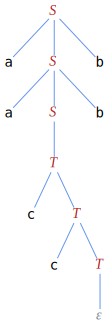

In [33]:
derivacion.arbol()

El lenguaje generado por una gramática $G$, denotado por $L(G)$, es el conjunto
de todas las cadenas que se pueden derivar a partir de la variable inicial de
$G$.
En nuestro ejemplo tenemos

In [34]:
lenguaje = gramatica1.producir_lenguaje()

# Mostrar los primeros 15 elementos del lenguaje.
Lenguaje(lenguaje, rebanada=slice(15))

No es difícil convencerse de que el lenguaje generado por esta gramática es el
lenguaje de todas las cadenas de la forma $\texttt{a}^n\texttt{c}^m\texttt{b}^n$
(el mismo número de `a` que de `b`) para $n, m \ge 0$.

**Actividad** Considera la siguiente gramática y deriva las siguientes
oraciones:
- “Luigi esquiva un caparazón”
- “Ella piensa que Mario toma una moneda”

In [35]:
gramatica = ejemplos.gramatica2()
gramatica.reglas

1. $\textcolor{firebrick}{\textit{Oracion}} \to \textcolor{firebrick}{\textit{Sujeto}} \texttt{␣} \textcolor{firebrick}{\textit{Predicado}}$
2. $\textcolor{firebrick}{\textit{Sujeto}} \to \textcolor{firebrick}{\textit{Articulo}} \texttt{␣} \textcolor{firebrick}{\textit{Sustantivo}}$
3. $\textcolor{firebrick}{\textit{Sujeto}} \to \textcolor{firebrick}{\textit{NombrePropio}}$
4. $\textcolor{firebrick}{\textit{Sujeto}} \to \textcolor{firebrick}{\textit{Pronombre}}$
5. $\textcolor{firebrick}{\textit{Predicado}} \to \textcolor{firebrick}{\textit{PredicadoSimple}}$
6. $\textcolor{firebrick}{\textit{Predicado}} \to \textcolor{firebrick}{\textit{PredicadoCompuesto}}$
7. $\textcolor{firebrick}{\textit{PredicadoSimple}} \to \textcolor{firebrick}{\textit{VerboSimple}} \texttt{␣} \textcolor{firebrick}{\textit{Objeto}}$
8. $\textcolor{firebrick}{\textit{PredicadoSimple}} \to \textcolor{firebrick}{\textit{VerboSimple}} \texttt{␣} \textcolor{firebrick}{\textit{Preposicon}} \texttt{␣} \textcolor{firebrick}{\textit{Objeto}}$
9. $\textcolor{firebrick}{\textit{Objeto}} \to \textcolor{firebrick}{\textit{Articulo}} \texttt{␣} \textcolor{firebrick}{\textit{Sustantivo}}$
10. $\textcolor{firebrick}{\textit{PredicadoCompuesto}} \to \textcolor{firebrick}{\textit{VerboCompuesto}} \texttt{␣} \textcolor{firebrick}{\textit{Oracion}}$
11. $\textcolor{firebrick}{\textit{Preposicon}} \to \texttt{a}$
12. $\textcolor{firebrick}{\textit{Preposicon}} \to \texttt{con}$
13. $\textcolor{firebrick}{\textit{Preposicon}} \to \texttt{de}$
14. $\textcolor{firebrick}{\textit{Preposicon}} \to \texttt{por}$
15. $\textcolor{firebrick}{\textit{Preposicon}} \to \texttt{sobre}$
16. $\textcolor{firebrick}{\textit{Articulo}} \to \texttt{el}$
17. $\textcolor{firebrick}{\textit{Articulo}} \to \texttt{la}$
18. $\textcolor{firebrick}{\textit{Articulo}} \to \texttt{un}$
19. $\textcolor{firebrick}{\textit{Articulo}} \to \texttt{una}$
20. $\textcolor{firebrick}{\textit{Pronombre}} \to \texttt{él}$
21. $\textcolor{firebrick}{\textit{Pronombre}} \to \texttt{ella}$
22. $\textcolor{firebrick}{\textit{Sustantivo}} \to \texttt{moneda}$
23. $\textcolor{firebrick}{\textit{Sustantivo}} \to \texttt{caparazón}$
24. $\textcolor{firebrick}{\textit{Sustantivo}} \to \texttt{hongo}$
25. $\textcolor{firebrick}{\textit{Sustantivo}} \to \texttt{flor}$
26. $\textcolor{firebrick}{\textit{Sustantivo}} \to \texttt{estrella}$
27. $\textcolor{firebrick}{\textit{NombrePropio}} \to \texttt{Mario}$
28. $\textcolor{firebrick}{\textit{NombrePropio}} \to \texttt{Luigi}$
29. $\textcolor{firebrick}{\textit{VerboSimple}} \to \texttt{come}$
30. $\textcolor{firebrick}{\textit{VerboSimple}} \to \texttt{salta}$
31. $\textcolor{firebrick}{\textit{VerboSimple}} \to \texttt{toma}$
32. $\textcolor{firebrick}{\textit{VerboSimple}} \to \texttt{golpea}$
33. $\textcolor{firebrick}{\textit{VerboSimple}} \to \texttt{esquiva}$
34. $\textcolor{firebrick}{\textit{VerboCompuesto}} \to \texttt{dice␣que}$
35. $\textcolor{firebrick}{\textit{VerboCompuesto}} \to \texttt{piensa␣que}$
36. $\textcolor{firebrick}{\textit{VerboCompuesto}} \to \texttt{sabe␣que}$

In [36]:
derivacion = (
    gramatica.hacer_derivacion()
    .aplicar_regla(1)
    .aplicar_regla(3)
    .aplicar_regla(28)
    .aplicar_regla(5)
    .aplicar_regla(7)
    .aplicar_regla(33)
    .aplicar_regla(9)
    .aplicar_regla(18)
    .aplicar_regla(23)
)
derivacion

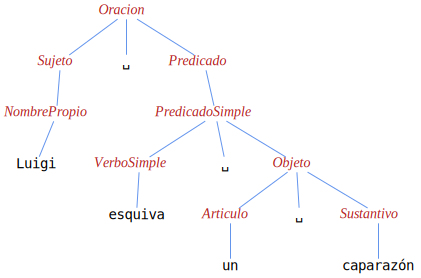

In [37]:
derivacion.arbol()

In [38]:
derivacion = (
    gramatica.hacer_derivacion()
    .aplicar_regla(1)
    .aplicar_regla(4)
    .aplicar_regla(21)
    .aplicar_regla(6)
    .aplicar_regla(10)
    .aplicar_regla(35)
    .aplicar_regla(1)
    .aplicar_regla(3)
    .aplicar_regla(27)
    .aplicar_regla(5)
    .aplicar_regla(7)
    .aplicar_regla(29)
    .aplicar_regla(9)
    .aplicar_regla(18)
    .aplicar_regla(24)
)
derivacion

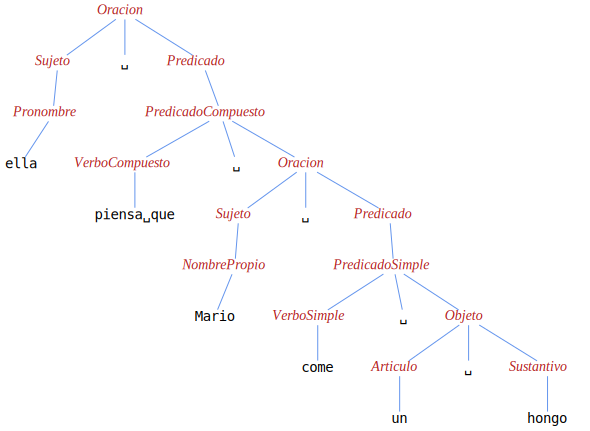

In [39]:
derivacion.arbol()

In [40]:
lenguaje = gramatica.producir_lenguaje()
for w in muestra(lenguaje, 10):
    print(w)

la flor toma un caparazón
el estrella come sobre la moneda
un moneda come por un hongo
un estrella sabe que ella esquiva la flor
Luigi dice que él salta a el estrella
Luigi piensa que una estrella salta una flor
él dice que la moneda golpea una hongo
él piensa que Mario esquiva de una flor
ella sabe que ella salta sobre una caparazón
el caparazón sabe que la estrella esquiva sobre un flor


**Actividad** Aquí hay algunas aplicaciones divertidas de las gramáticas libres
de contexto:
- [Mathgen][1] genera artículos de matemáticas completamente aleatorios.
- [Dada Engine][2] genera historias cortas a partir de plantillas; requiere
  compilar.
- [Tracery][3] es una librería de Python para generar texto a partir de
  gramáticas libres de contexto.

[1]: https://thatsmathematics.com/mathgen/
[2]: https://dev.null.org/dadaengine/
[3]: https://tracery.io/


### La definición formal de gramáticas libres de contexto
A estas alturas la definición formal de una gramática libre de contexto es
meramente un tecnicismo, pero la presentamos a continuación para completar el
concepto:


**Definición** Una *gramática libre de contexto* es una 4-ada
$G = \left( V, \Sigma, R, S \right)$ donde

- $V$ es un conjunto finito de *variables*.
- $\Sigma$ es un conjunto finito de *símbolos terminales*
  ($V \cap \Sigma = \emptyset$).
- $R \subseteq V \times (V \cup \Sigma)^*$ es un conjunto finito de *reglas de
  producción*, cada regla $r = (v, w)$ se denota por
  $$v\rightarrow w$$
- $S \in V$ es la *variable inicial*.

**Definición** Si $A\to w$ es una regla de la gramática $G$, entonces decimos
que $uAv$ **produce** la cadena $uwv$, y lo denotamos por $uAv\Rightarrow uwv$.
Más aún, si $$u = u_1 \Rightarrow u_2 \Rightarrow \cdots \Rightarrow u_k = v$$
es una sucesión de producciones, entonces decimos que $u$ **deriva** a $v$ y
lo denotamos por $u\overset{*}{\Rightarrow} v$.

**Definición** El *lenjuage generado* por una gramática $G=(V, \Sigma, R, S)$, denotado por
$L(G)$, es el conjunto de todas las cadenas que se pueden derivar a partir de
la variable inicial.
$$L(G) = \{w\in \Sigma^* \mid S \overset{*}{\Rightarrow} w\}$$

### Estudio de caso: Los árboles de sintaxis abstracta de Python
Python incluye su propio módulo para analizar el código fuente de un programa.

In [41]:
import ast  # Abstract Syntax Tree

arbol = ast.parse("2*x + cos(math.pi)", mode="eval")
arbol

Todo árbol AST de Python es una instancia de la clase `ast.AST`.
El atributo `body` contiene una lista de nodos que representan las instrucciones
del programa, y es un *subárbol*.

In [42]:
raiz = arbol.body
raiz

Podemos explorar de uno por uno los hijos de la raíz del árbol, y así
recorrerlo en profundidad.

In [43]:
print("Hijo izquierdo:", raiz.left)
print("Operador:", raiz.op)
print("Hijo derecho:", raiz.right)

Hijo izquierdo: <ast.BinOp object at 0x7a13ddfdd7e0>
Operador: <ast.Add object at 0x7a13e3250220>
Hijo derecho: <ast.Call object at 0x7a13ddfdfe80>


In [44]:
# Descendemos dos veces por la rama izquierda hasta encontrar la
# constante (2)
raiz.left.left.value

2

Podemos representar un árbol como una expresión de Python, de manera que toda
la información del árbol se pueda guardar en un archivo de texto.
En una sola línea muy larga, pero se puede.
Intenta analizar el resultado de la siguiente celda, ten mucho cuidado con los
paréntesis.

In [45]:
print(ast.dump(raiz))

BinOp(left=BinOp(left=Constant(value=2), op=Mult(), right=Name(id='x', ctx=Load())), op=Add(), right=Call(func=Name(id='cos', ctx=Load()), args=[Attribute(value=Name(id='math', ctx=Load()), attr='pi', ctx=Load())], keywords=[]))


En cada nodo también puedes iterar sobre sus hijos, y así recorrer el árbol de
forma algorítmica.

In [46]:
list(ast.iter_child_nodes(raiz))

Para simplicidad, he creado una biblioteca que nos permite visualizar los
árboles de sintaxis abstracta de Python de una manera más amigable.

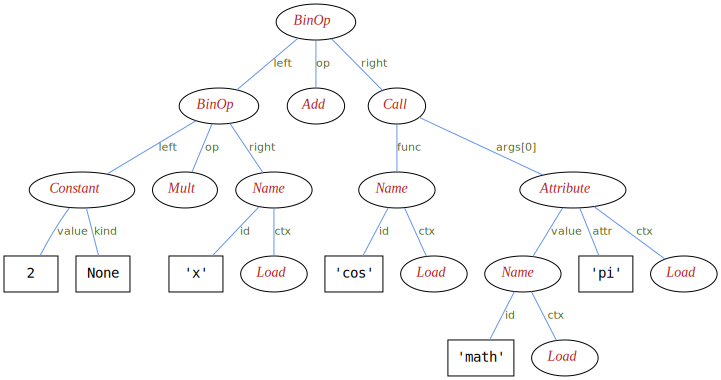

In [47]:
from materiales.visualizaciones.diagramasast import DiagramaAST

DiagramaAST(raiz)

**Actividad** Ahora tú crea una expresión de Python y visualiza su árbol de
sintaxis abstracta.

![Debate del orden de operaciones](https://pbs.twimg.com/media/FGiwvq1VUAUyToA?format=jpg&name=small)

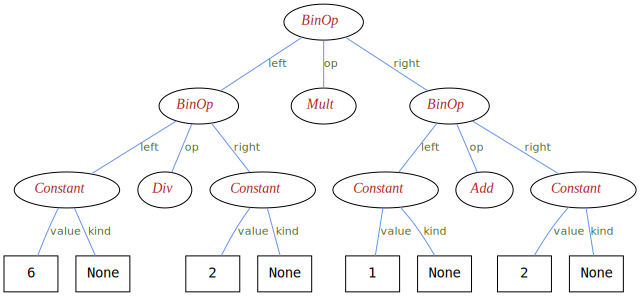

In [48]:
expr = '6/2*(1+2)'
arbol = ast.parse(expr, mode="eval")
DiagramaAST(arbol.body)

### Diseño de gramáticas
En computación, las gramáticas libres de contexto se suelen escribir en una
notación estándar llamada *Backus-Naur Form* (BNF).
Es nombrada así en honor a John Backus y Peter Naur, ambos miembros del comité
de Algol, quienes propusieron a las gramáticas libres de contexto para definir
al lenguaje Algol60.

- La flecha de las reglas de producción se sustituye por `::=`.
- Las variables se escriben entre paréntesis angulares; por ejemplo `<S>`.
- Las cadenas se escriben entre comillas dobles; por ejemplo `"hola"`.
- Las producciones que tienen la misma variable a la izquierda se pueden
  agrupar usando una barra vertical `|`.

**Ejemplo**: La gramática anterior se puede escribir en notación BNF de la
siguiente manera:

```
<S> ::= "a"<S>"b" | <T>
<T> ::= "c"<T> | ""
```

In [49]:
# Definimos una gramática libre de contexto usando la notación BNF.
texto_bnf = """
    <S> ::= "a" <S> "b" | <T>
    <T> ::= "c" <T> | ""
"""

# Creamos una gramática libre de contexto a partir de la notación BNF.
gramatica = GramaticaLibreContexto.desde_bnf(texto_bnf)
gramatica

- ***S*** $\to$ `a`***S***`b` | ***T***
- ***T*** $\to$ `c`***T*** | ${\varepsilon}$

#### Ambigüedad en gramáticas
Una gramática **ambigua** es aquella en donde hay al menos una cadena que se
puede derivar de dos o más maneras distintas.
Esto es de principal preocupación para los diseñadores de lenguajes de
programación, porque una ambigüedad en la gramática puede llevar a dos
interpretaciones distintas para un mismo segmento de código.

In [50]:
texto_bnf = """
    <EXPR> ::= <ID> | <EXPR>"+"<EXPR> | <EXPR>"*"<EXPR> | "-"<EXPR>  | "("<EXPR>")"
    <ID> ::= "a" | "b" | "c"
"""
gramatica = GramaticaLibreContexto.desde_bnf(texto_bnf)
gramatica.reglas

1. $\textcolor{firebrick}{\textit{EXPR}} \to \textcolor{firebrick}{\textit{ID}}$
2. $\textcolor{firebrick}{\textit{EXPR}} \to \textcolor{firebrick}{\textit{EXPR}} \texttt{+} \textcolor{firebrick}{\textit{EXPR}}$
3. $\textcolor{firebrick}{\textit{EXPR}} \to \textcolor{firebrick}{\textit{EXPR}} \texttt{*} \textcolor{firebrick}{\textit{EXPR}}$
4. $\textcolor{firebrick}{\textit{EXPR}} \to \texttt{-} \textcolor{firebrick}{\textit{EXPR}}$
5. $\textcolor{firebrick}{\textit{EXPR}} \to \texttt{(} \textcolor{firebrick}{\textit{EXPR}} \texttt{)}$
6. $\textcolor{firebrick}{\textit{ID}} \to \texttt{a}$
7. $\textcolor{firebrick}{\textit{ID}} \to \texttt{b}$
8. $\textcolor{firebrick}{\textit{ID}} \to \texttt{c}$

In [51]:
derivacion1 = (
    gramatica.hacer_derivacion()
    .aplicar_regla(2)
    .aplicar_regla(1)
    .aplicar_regla(6)
    .aplicar_regla(3)
    .aplicar_regla(1)
    .aplicar_regla(7)
    .aplicar_regla(1)
    .aplicar_regla(8)
)
derivacion1

In [52]:
derivacion2 = (
    gramatica.hacer_derivacion()
    .aplicar_regla(3)
    .aplicar_regla(2)
    .aplicar_regla(1)
    .aplicar_regla(6)
    .aplicar_regla(1)
    .aplicar_regla(7)
    .aplicar_regla(1)
    .aplicar_regla(8)
)
derivacion2

Aunque ambas derivaciones producen la misma cadena `a+b*c`, sus árboles de
sintraxis abstracta son distintos, y por lo tanto, el significado de la cadena
es distinto: 

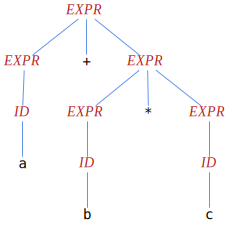

In [53]:
derivacion1.arbol()

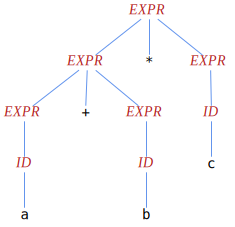

In [54]:
derivacion2.arbol()

## 4. Diseño de compiladores

Como hemos visto, las gramáticas libres de contexto son una herramienta muy
importante para diseñar lenguajes de programación.
El siguiente paso es diseñar un compilador que traduzca el código fuente
definido por la gramática en un programa ejecutable.

Este curso es acerca de los principios y paradigmas de los lenguajes de
programación, así que no vamos a profundizar en el diseño de compiladores, pero
vale la pena tener una breve introducción para entender la magnitud de la tarea.
En general, un compilador se divide en los siguientes procesos:

1. **Análisis léxico**: El código fuente se secciona en **tokens** o palabras
   individuales, que son los elementos más pequeños del lenguaje.
   Por ejemplo, números, variables, signos de operación, etc.
2. **Análisis sintáctico**: Los tokens se agrupan en árboles de sintaxis
   abstracta, que representan la estructura del programa.
3. **Análisis semántico**: Los árboles de sintaxis abstracta se anotan con
   información adicional, como el tipo de dato de cada variable.
4. **Generación de forma intermedia**: Se genera un programa en un lenguaje
   intermedio, que es más fácil de traducir a código máquina.
5. **Optimización**: Se aplican optimizaciones al programa intermedio.
6. **Generación de código**: Se genera el código máquina del programa.


### El análisis léxico
El propósito del análisis léxico es dividir una cadena texto (el *código
fuente*) en una sucesión finita de *tokens*.
Los tokens son las unidades más pequeñas del lenguaje y usualmente se
representan con constantes enteras, por ejemplo, `NUMERO = 1`, `SUMA = 2`,
`RESTA = 3`, `IDENTIFICADOR = 4`, etc.

Cuando se usa esta representación, es necesario utilizar una **tabla de
símbolos** para almacenar los identificadores y sus valores, de manera que si a
continuación tenemos un token de tipo `IDENTIFICADOR`, podemos obtener su valor
(el nombre de la variable, función o clase) de la tabla.

Otra representación es utilizar parejas de la forma $(\mathit{tipo},
\mathit{valor})$, donde $\mathit{tipo}$ es un entero que indica el tipo de token
y $\mathit{valor}$ es el valor del token en caso de que sea un identificador,
un número, etc.

En cualquier caso, el análisis léxico es una función que toma una cadena de
texto y devuelve una lista de tokens.

**Actividad** Revisar el ejemplo [*Escribir un Tokenizador*][1] de la
documentación de Python.

[1]: https://docs.python.org/es/3/library/re.html#writing-a-tokenizer


### El análisis sintáctico

El análisis sintáctico es el proceso de analizar una sucesión de tokens y
producir un árbol de sintaxis abstracta, de la misma forma que vimos en el
ejemplo de la gramática de Python.

Aquí es donde las gramáticas libres de contexto entran en juego, porque los
árboles de sintaxis abstracta se pueden generar a partir de los árboles de
derivación de una gramática de forma muy natural.

Existe mucha teoría sobre el análisis sintáctico, ya que encontrar un árbol
de derivación para una cadena de tokens es un problema complejo.
El interesado puede consultar una introducción mediante ejemplos mirando el
siguiente video:

[![Análisis sintáctico](https://img.youtube.com/vi/ww0Z9uc3a2U/0.jpg)](https://www.youtube.com/watch?v=ww0Z9uc3a2U)

Existen *compiladores de compiladores* que pueden generar un *analizador
sintáctico* de forma automática a partir de una gramática escrita en BNF.
Entre estos podemos destacar a [ANTLR][1], y [Bison][2].

[1]: https://www.antlr.org/
[2]: https://www.gnu.org/software/bison/

**Actividad** Realiza la práctica *Explorando una gramática de ejemplo con
Bison* incluida en el directorio `practicas/Bison` de este repositorio.

### El análisis semántico

El árbol de sintaxis abstracta nos indica que el código fuente es
sintácticamente válido, pero no considera el contexto de estas instrucciones.
Por ejemplo, en los lenguajes donde las variables deben ser declaradas y
asociadas a un tipo de dato (p.ej. números enteros solamente), el árbol de
sintaxis abstracta no nos dice si una variable se está usando de forma correcta.

Por ejemplo, el siguiente fragmento de código es sintácticamente correcto en 
Python, pero está plagado de errores semánticos (¿Puedes encontrarlos todos?):
    
```python
# Obtendrás errores si ejecutas esta línea:
'Esto'[15] = (None + 'está').mal**2
```

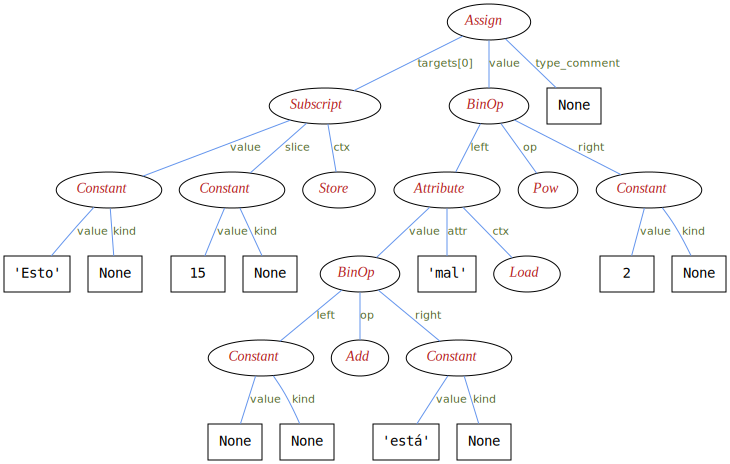

In [55]:
from materiales.visualizaciones.diagramasast import DiagramaAST
import ast

# Python dice que esta expresión es sintácticamente correcta, y hasta
# produce un árbol de sintaxis abstracta sin problemas.
arbol = ast.parse("'Esto'[15] = (None + 'está').mal**2", mode="exec")
raiz = arbol.body[0]
DiagramaAST(raiz)

El objetivo del análisis semántico es detectar este tipo de violaciones a las
restricciones semánticas del lenguaje y reportarlas al usuario durante el
proceso de compilación.

### La generación de forma intermedia

La forma intermedia es un programa en un lenguaje intermedio que es más fácil
de traducir a código máquina, pero que aún está abierto a la posibilidad de
aplicar optimizaciones.

- La forma intermedia puede ser una estructura de datos en memoria, como un
  árbol de sintaxis abstracta con anotaciones semánticas, o un lenguaje de tipo
  ensamblador de alto nivel.
- Si un lenguaje tiene que soportar varias arquitecturas de computadora, es
  conveniente utilizar una forma intermedia independiente de la arquitectura
  objetivo.
- A veces se utiliza un lenguaje intermedio estándar, como [LLVM][1], pero en
  otros casos se utiliza un lenguaje intermedio propio del compilador.

A la persona interesada le recomiendo revisar el tutorial de LLVM [My First
Language Frontend with LLVM Tutorial][2]

[1]: https://llvm.org/
[2]: https://llvm.org/docs/tutorial/MyFirstLanguageFrontend/index.html

### La optimización de código

El código producido en las fases anteriores seguramente puede ser optimizado:

- **Quitar código muerto** El *código muerto* son instrucciones que no tienen
  efecto en el programa.
  Por ejemplo, una variable que se declara pero nunca se usa.
- **Expansión en línea** Algunas llamadas a funciones ocurren muy frecuentemente
  y son demasiado cortas, por lo que es más eficiente reemplazar la llamada por
  el código de la función.
- **Factorización de subexpresiones** Si calculas el mismo valor varias veces,
  es más eficiente calcularlo una sola vez y guardarlo en una variable.
- **Optimización de bucles** Existen varias optimizaciones que se pueden aplicar
  a los bucles, como la eliminación de bucles vacíos, pero una de las
  optimzaciones más comunes consiste en mover las instrucciones que calculan
  constantes fuera del bucle.

In [56]:
def f(x):
    return 5
    print("hola")  # Este es código muerto.

### La generación de código

Finalmente, la forma intermedia se traduce a lenguaje máquina.
En esta fase desaparecen los identificadores y son reemplazados por números de
registros en memoria.


## 5. Los límites de la programación

En el curso de principios de lenguajes de programación, estudiamos la teoría de
lenguajes formales, que es una parte importante de la teoría de la computación.
Los estudiantes suelen preguntarse si la inteligencia artificial puede
reemplazar a los programadores. Para responder a esta pregunta, es importante
conocer el teorema de Turing de 1936, que dice que hay problemas que ningún
algoritmo puede resolver.
Esto significa que, o las computadoras no pueden reemplazar a los programadores,
o los humanos también tenemos límites y hay problemas que nunca podremos
resolver.
Este teorema es relevante porque nos ayuda a entender qué podemos y no podemos
hacer con los programas que escribimos.
A continuación, veremos este teorema con más detalle.

Muchos de los temas que hemos visto hasta ahora pertenecen al dominio de la
**Teoría de la Computación**, que estudia las capacidades y limitaciones de las
los algoritmos o, equivalentemente, de las computadoras que los ejecutan.

- Para definir un *lenguaje máquina* en el tema anterior, primero tuvimos que
  tener un concepto de *máquina abstracta*.
  Esto es parte de la teoría de autómatas.
- En el tema de las gramáticas libres de contexto, vimos la forma de definir un
  lenguaje mediante reglas de producción.
  Esto es parte de la teoría de lenguajes formales.
- En realidad, la teoría de autómatas y de lenguajes formales se consideran una
  misma, ya que para cada lenguaje hay un autómata (*compilador* o *intérprete*)
  que es equivalente.
  Esta equivalencia en su momento no fue obvia, y se le reconoce a Noam Chomsky
  por haberla demostrado.

En este contexto, nuestro objetivo es estudiar uno de los límites más
interesantes de la computación, que es el **problema de la detención**.

### Problemas computacionales

**Definición**. Un **problema computacional** es una relación $\mathcal R$ entre
datos de entrada ($\mathcal I$) y datos de salida ($\mathcal S$).

Usaremos la fórmula “**dado(s)** $I$, **encontrar** $S$ tal que $\mathcal R$”
como en este ejemplo:

> **Problema** (de la factorización):
> - **Dado** un número entero $n > 1$,
> - **encontrar** un número mayor a $1$ pero menor a $n$ que lo divida
>   exactamente.


Esta fórmula contiene los tres ingredientes para definir el problema
computacional:
- El conjunto de *instancias* del problema, que son todos los números enteros
  mayores a 1.
  $$\mathcal I = \{2, 3, 4, 5, 6, \ldots\}$$
- El conjunto de *soluciones* del problema, que también son números enteros.
  $$\mathcal S = \{2, 3, 4, 5, 6, \ldots\}$$
- La *relación* entre las instancias dice que $k$ es solución de $n$ si $k$
  es menor a $n$ y divide exactamente a $n$.
  $$\mathcal R = \{(n, k) \in \mathcal I \times \mathcal S \mid k < n;
  n \bmod k = 0\}$$ 


**Observación**.
Desde el punto de vista matemático podemos representar a un problema
computacional simplemente como
$\mathcal R \subseteq \mathcal I \times \mathcal S$, ya que $S$ es una solución
de la instancia $I$ si y solo si $(I, S) \in \mathcal R$.

Aunque el formalismo matemático es útil para definir con precisión un problema,
es más importante describirlo de manera clara y concisa para que pueda ser
entendido por cualquier programador.

Este problema lo podemos resolver mediante un algoritmo como por ejemplo este:

In [57]:
def encontrar_factor(n: int) -> int | None:
    """Encuentra un factor de un número."""
    # Verificamos que la entrada esté en el conjunto de instancias:
    if not isinstance(n, int) or n <= 1:
        raise ValueError("n debe ser un entero mayor que 1")
    
    # Procedemos a buscar una solución por fuerza bruta:
    for k in range(2, n):
        if n % k == 0:
            return k
    
    # No hay solución:
    return None

print(f"{encontrar_factor(4)=}")
print(f"{encontrar_factor(9)=}")
print(f"{encontrar_factor(11)=}")

encontrar_factor(4)=2
encontrar_factor(9)=3
encontrar_factor(11)=None


Existen problemas computacionales que requieren más de un dato, o bien datos
complejos; por ejemplo el problema de *devolver el cambio*:

> **Problema** (de la suma de subconjuntos):
> - **Dada** una lista de números enteros $S$ y un número entero $k$,
> - **encontrar** una sublista de $S$ cuya suma sea $k$.

En este caso, una instancia podría ser la lista $S = [1, 2, 3, 4, 5]$ y el
número $k = 7$, y una solución sería la sublista $[2, 5]$, porque $2 + 5 = 7$.
También hay instancias sin solución, como por ejemplo $S = [2, 3, 5]$ con
$k = 6$.
Si lo piensas bien, esta es una generalización del problema que tienen que
resolver los cajeros de las tiendas cuando te devuelven el cambio, es sólo que
el sistema monetario está diseñado para que la solución siempre sea fácil de
encontrar (o de determinar que no existe).


**Actividad** El sitio [OmegaUp][omegaup] es una plataforma de entrenamiento
para programadores en español y contiene muchos problemas computacionales.
Entra al sitio, elige cinco problemas, e identifica cuáles son las instancias,
las soluciones, y la relación entre ellas.
No es necesario que resuelvas los problemas (para eso tendrás la clase de
algoritmia), pero sí es importante que entiendas cómo se definen los problemas
computacionales.

[omegaup]: https://omegaup.com/

**Definición**. Decimos que un algorimto **resuelve** un problema computacional
$\mathcal R$ si para cada instancia $I\in \mathcal I$, el algoritmo produce una
solución correcta $S \in \mathcal S$ en un número finito de pasos, o bien indica
que no hay solución.

Si analizamos esta definición, nos damos cuenta de que un algoritmo es un tipo
muy particular de una relación: a cada entrada (instancia) le asocia una salida
(solución) de manera única.
¡Y esto es precisamente lo que hace una función matemática!
Sin embargo, para poder hablar del *conjunto de todos los algoritmos*
necesitamos un paso adicional: los conjuntos de entrada y salida deberían estar
bien definidos.

### La función universal

Python es un lenguaje de programación muy poderoso, y su naturaleza de ser un
lenguaje interpretado le permite hacer cosas que otros lenguajes no pueden, como
cuando construimos un generador de todos los programas de Python válidos.
En particular, podemos construir una función de Python que sea capaz de evaluar
cualquier otra función de Python.

In [58]:
from typing import Any, Callable
import ast


def compilar_funcion(funcion: str) -> Callable[..., Any]:
    """Compila una función y retorna el objeto correspondiente.

    Parámetros
    ----------
    funcion : str
        Código fuente de la función a compilar. Tiene que ser una
        única instrucción "def" que define una función.

    Retorna
    -------
    Callable[..., Any]
        Objeto que representa la función compilada.
    """

    # Verificamos que la función sea una única instrucción que
    # corresponde a definir una función.
    arbol = ast.parse(funcion, mode="exec")
    if len(arbol.body) != 1:
        raise ValueError("Se esperaba una única instrucción.")
    raiz = arbol.body[0]
    if not isinstance(raiz, ast.FunctionDef):
        raise ValueError("Se esperaba una definición de función.")

    # Compilamos la función.
    entorno = {}
    exec(funcion, entorno)
    return entorno[raiz.name]


def compilar_argumentos(argumentos: str) -> tuple[Any, ...]:
    """Compila una tupla de argumentos y retorna el objeto correspondiente.

    Parámetros
    ----------
    argumentos : str
        Cadena que representa una tupla de argumentos para una función.

    Retorna
    -------
    tuple[Any, ...]
        Tupla de argumentos compilada.
    """

    # Cargamos los argumentos de la función como una tupla.
    entrada = ast.literal_eval(argumentos)
    if not isinstance(entrada, tuple):
        raise ValueError("Los argumentos deben ser una tupla.")
    return entrada


def aplicar(funcion: str, argumentos: str) -> Any:
    """Aplica una función a una tupla de argumentos.

    Parámetros
    ----------
    funcion : str
        Código fuente de la función a evaluar. Tiene que ser una
        única instrucción "def" que define una función.
    argumentos : str
        Cadena que representa una tupla de argumentos para la función.

    Retorna
    -------
    Any
        Resultado de evaluar la función con los argumentos.
    """

    # Compilamos la función y los argumentos.
    algoritmo = compilar_funcion(funcion)
    entrada = compilar_argumentos(argumentos)

    # Evaluamos la función con los argumentos.
    return algoritmo(*entrada)

A este tipo de funciones que pueden ejecutar cualquier otra función se les
llama **funciones universales**.
Veamos cómo se usa:

In [59]:
# Ejemplo 1: Suma de dos números.
func_suma = "def suma(a, b): return a + b"
args = "(2, 3)"

aplicar(func_suma, args)

5

In [60]:
# Ejemplo 2: Misma función, diferente argumento.
args = "(5, 7)"
aplicar(func_suma, args)

12

In [61]:
# Ejemplo 3: Determinar si un número es primo.
func_primo = """\
def primo(n):
    if n < 2:
        return False
    for k in range(2, n):
        if n % k == 0:
            return False
    return True
"""

args = "(11,)"  # La coma indica una tupla de un solo elemento.

aplicar(func_primo, args)

True

Como podemos ver, esta función se le llama *universal* porque puede evaluar
cualquier otra función.
Si pensamos en la posibilidad de resolver *cualquier* problema computacional,
entonces necesitamos una función que pueda evaluar cualquier algoritmo.

Sin embargo podemos notar rápidamente un detalle importante: la función
universal no es un algoritmo, porque no siempre termina.

In [62]:
func_ciclo = """\
def ciclo(n):
    while n > 0:
        n += 1
"""

args = "(5,)"

Si intentas ejecutar `aplicar(func_ciclo, args)` según la celda anterior, el
programa nunca terminará de ejecutarse, ya que `func_ciclo` produce un ciclo
infinito para cualquier argumento $n > 0$.
Lo que nos lleva a la siguiente pregunta: ¿hay alguna manera de saber si un
algoritmo terminará en un número finito de pasos ante una entrada dada?
Dicho de otra manera, si tenemos un algoritmo $A$ y una entrada $I$, ¿cómo
podemos saber si $A(I)$ terminará de ejecutarse?
Quizá para este caso tan simple la respuesta sea obvia, pero en general no lo
es, y es un problema que ha sido estudiado por muchos matemáticos y
computólogos.

### El problema de la detención

**Problema** (de la detención):
- **Dado** un algoritmo $A$ y una entrada $I$,
- **determinar** si $A(I)$ terminará de ejecutarse en un número finito de pasos.

Este problema es la quintaesencia de los problemas computacionales: aplica a
cualquier algoritmo y cualquier entrada, y es muy fácil de entender.
En esencia, la pregunta es si es posible distinguir entre una instancia muy
difícil y una instancia imposible.

En la prácitca los programadores establecen de maera arbitraria un límite de
tiempo para que un algoritmo termine de ejecutarse, y si el algoritmo no termina
en ese tiempo, se produce un error.

In [63]:
# Ejemplo de un algoritmo muy lento.
import time

def fibonacci(n: int) -> int:
    """Calcula el n-ésimo número de Fibonacci de forma recursiva."""
    if n < 2:
        return n
    return fibonacci(n - 1) + fibonacci(n - 2)

# Medimos el tiempo que tarda en calcular algunos números de Fibonacci.
for n in range(32, 40):
    tiempo_inicio = time.perf_counter()
    resultado = fibonacci(n)
    tiempo_total = time.perf_counter() - tiempo_inicio
    print(f"Fibonacci({n}) = {resultado} (tardó {tiempo_total:.2f} segundos)")


Fibonacci(32) = 2178309 (tardó 0.22 segundos)
Fibonacci(33) = 3524578 (tardó 0.35 segundos)
Fibonacci(34) = 5702887 (tardó 0.57 segundos)
Fibonacci(35) = 9227465 (tardó 0.94 segundos)
Fibonacci(36) = 14930352 (tardó 1.52 segundos)
Fibonacci(37) = 24157817 (tardó 2.46 segundos)
Fibonacci(38) = 39088169 (tardó 4.02 segundos)
Fibonacci(39) = 63245986 (tardó 6.44 segundos)


In [64]:
# Ejemplo de cómo se resuelve el problema de la detención en la
# práctica.
import multiprocessing

tiempo_espera = 5  # Tiempo máximo de espera en segundos.

# Ejecutamos fibonacci ante la entrada 500 en un proceso separado.
proceso = multiprocessing.Process(target=fibonacci, args=(500,))
proceso.start()

# Esperar a que termine o se agote el tiempo.
proceso.join(tiempo_espera)
if proceso.is_alive():
    proceso.terminate()
    print("El proceso fue interrumpido.")
else:
    print("El proceso terminó correctamente.")

El proceso fue interrumpido.


Este método es muy efectivo en la práctica, pero no resuelve el problema de la
detención, porque en realidad no estamos determinando si el algoritmo terminará
de ejecutarse, sino si terminará de ejecutarse en un tiempo razonable pero
arbitrario.

**Teorema** (Turing, 1936). El problema de la detención no es computable, es
decir, no existe un algoritmo que pueda determinar si un algoritmo terminará de
ejecutarse en un número finito de pasos ante una entrada dada.

*Idea de la demostración*. Suponemos que existe un algoritmo `termina` que
resuelve el problema de la detención y lo usamos para construir un algoritmo
`paradoja` que produce una contradicción.

In [65]:
def termina(funcion: str, argumentos: str) -> bool:
    """Determina si una función termina su ejecución.
    
    Parámetros
    ----------
    funcion : str
        Código fuente de la función a evaluar. Tiene que ser una
        única instrucción "def" que define una función.
    argumentos : str
        Cadena que representa una tupla de argumentos para la función.
    
    Retorna
    -------
    bool
        True si la función termina su ejecución, False en otro caso.
    """
    # Aquí va un código que, como veremos, es imposible de escribir.
    # Por ahora, supongamos que lo tenemos escrito y que funciona
    # correctamente.
    resultado = ...
    return bool(resultado)

In [66]:
def paradoja(funcion: str) -> None:
    """Contradice a la función `termina`."""
    # Verificamos que la entrada sea una función de Python, en caso
    # contrario, la función `compilar_funcion` lanzará una excepción.
    algoritmo = compilar_funcion(funcion)

    argumentos = repr((funcion,))
    if termina(funcion, argumentos):
        # La función termina ante su propio código como argumento.
        # Nosotros decidimos entrar en un bucle infinito.
        while True:
            pass
    # La función entra a un bucle infinito ante su propio código.
    # Nosotros decidimos terminar.
    return None

Abusaremos un poco de la notación para simplificar la explicación:
A partir de ahora no distinguiremos entre una función y su código fuente; por
ejemplo `fibonacci` será tanto la función que calcula el $n$-ésimo número de
Fibonacci como la cadena de texto que contiene el código fuente de esta función.
Podemos hacer este abuso porque gracias a este curso entendemos cómo funcionan
los compiladores e intérpretes.

Veamos el funcionamiento de `paradoja`:

1. Si `funcion` no es una función de Python, entonces `paradoja` termina; con un
   error, pero termina.
2. Si `funcion` es una función de Python, entonces `paradoja` utiliza la
   supuestamente existente función `termina` para determinar si
   `funcion(funcion)` termina.
3. Si `funcion(funcion)` termina, entonces `paradoja` entra en un ciclo `while`
   que nunca termina.
4. Si `funcion(funcion)` no termina, entonces `paradoja` termina con la
   instrucción `return`.

**Nota**. No hay nada de especial en que una función se llame con su propio
código fuente como argumento.
Los compiladores e intérpretes hacen esto de forma rutinaria.

En pocas palabras “*`paradoja(funcion)` termina si y
solo si `funcion(funcion)` no termina*”, o en símbolos:
$$\texttt{termina}(\texttt{paradoja}, \texttt{funcion}) 
 \iff \neg \texttt{termina}(\texttt{funcion}, \texttt{funcion})$$

¿Qué pasa si llamamos a `paradoja` con `paradoja` como argumento?
La fórmula anterior se convierte en
$$\texttt{termina}(\texttt{paradoja}, \texttt{paradoja}) 
 \iff \neg \texttt{termina}(\texttt{paradoja}, \texttt{paradoja})$$
En español, “*`paradoja(paradoja)` termina si y solo si `paradoja(paradoja)` no
termina*”.
¡Esto es una contradicción!
Pero cada paso de la demostración es correcto, así que la única conclusión
posible es que la suposición inicial “*existe un algoritmo `termina` que
resuelve el problema de la detención*” es falsa.

### Implicaciones de la irresolubilidad del problema de la detención

La existencia de problemas irresolubles tiene implicaciones importantes en la
teoría de la computación y en la práctica de la programación.
El problema de la detención sólo es la punta del iceberg en cuanto a problemas
irresolubles se refiere.
Mediante técnicas *de reducción* para comparar la dificultad entre problemas,
se puede mostrar que muchos otros problemas importantes son irresolubles.
En particular, el problema de la detención nos dice que no es posible escribir
un compilador que detecte posibles bucles infinitos en un programa; pero también
hay problemas más prácticos que no se pueden resolver, como el problema de
determinar si un programa tiene errores de lógica, o inferir automáticamente el
tipo de dato de una variable para ciertos lenguajes de programación.

Por ahora, ¡oh, estudiante de programación!, no te preocupes por estos problemas
irresolubles, ya que la mayoría de los problemas que encontrarás en la industria
de la programación sí tienen solución.
En caso de que te encuentres con un problema irresoluble, siempre puedes buscar
una variante del problema que sí tenga solución, o bien buscar una solución
aproximada que sea suficientemente buena para tus necesidades.
Como vimos, nadie resuelve el problema de la detención, pero en la práctica
podemos establecer un límite de tiempo, y eso es suficiente para la mayoría de
los casos.